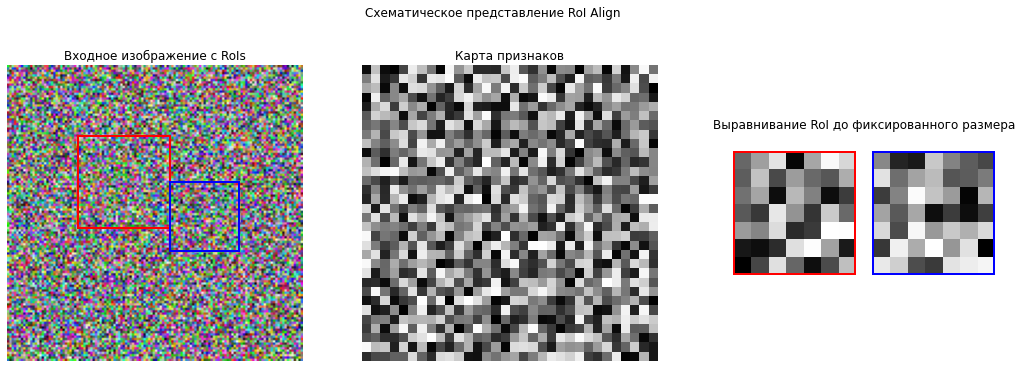

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_roi_align():
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Входное изображение с предложенными регионами
    ax[0].imshow(np.random.rand(128, 128, 3))
    ax[0].add_patch(patches.Rectangle((30, 30), 40, 40, edgecolor='r', facecolor='none', linewidth=2))
    ax[0].add_patch(patches.Rectangle((70, 50), 30, 30, edgecolor='blue', facecolor='none', linewidth=2))
    ax[0].set_title("Входное изображение с RoIs")
    ax[0].axis('off')

    # 2. Карта признаков
    ax[1].imshow(np.random.rand(32, 32), cmap='gray')
    ax[1].set_title("Карта признаков")
    ax[1].axis('off')

    # 3. RoI Align
    aligned_roi1 = np.random.rand(7, 7)
    aligned_roi2 = np.random.rand(7, 7)
    ax[2].imshow(aligned_roi1, cmap='gray', extent=(0, 7, 0, 7))
    ax[2].imshow(aligned_roi2, cmap='gray', extent=(8, 15, 0, 7))
    ax[2].add_patch(patches.Rectangle((0, 0), 7, 7, edgecolor='r', facecolor='none', linewidth=2))
    ax[2].add_patch(patches.Rectangle((8, 0), 7, 7, edgecolor='blue', facecolor='none', linewidth=2))
    ax[2].set_xlim(-1, 16)
    ax[2].set_ylim(-1, 8)
    ax[2].set_title("Выравнивание RoI до фиксированного размера")
    ax[2].axis('off')

    plt.suptitle("Схематическое представление RoI Align")
    plt.show()

plot_roi_align()

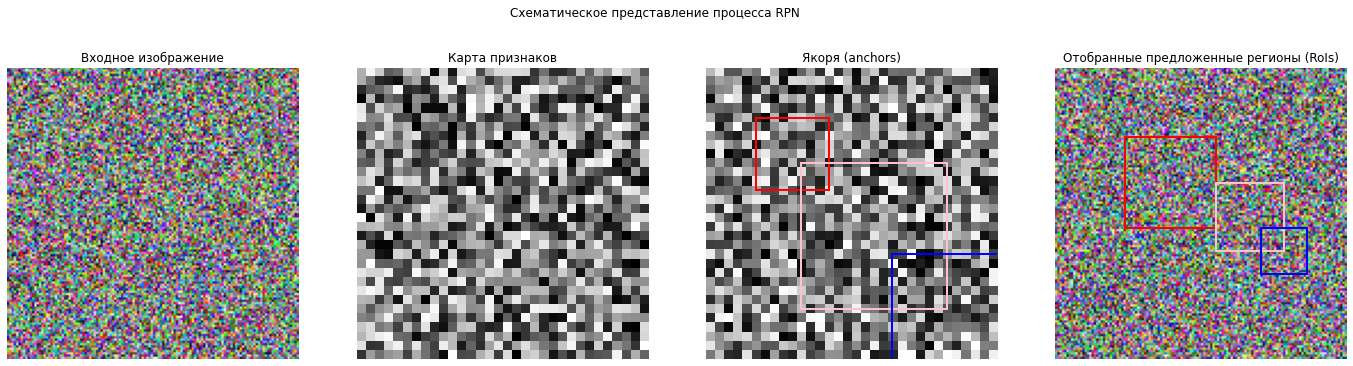

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_rpn():
    fig, ax = plt.subplots(1, 4, figsize=(24, 6))

    # 1. Входное изображение
    ax[0].imshow(np.random.rand(128, 128, 3))
    ax[0].set_title("Входное изображение")
    ax[0].axis('off')

    # 2. Карта признаков
    ax[1].imshow(np.random.rand(32, 32), cmap='gray')
    ax[1].set_title("Карта признаков")
    ax[1].axis('off')

    # 3. Якоря (anchors)
    ax[2].imshow(np.random.rand(32, 32), cmap='gray')
    ax[2].add_patch(patches.Rectangle((5, 5), 8, 8, edgecolor='r', facecolor='none', linewidth=2))
    ax[2].add_patch(patches.Rectangle((10, 10), 16, 16, edgecolor='pink', facecolor='none', linewidth=2))
    ax[2].add_patch(patches.Rectangle((20, 20), 24, 24, edgecolor='b', facecolor='none', linewidth=2))
    ax[2].set_title("Якоря (anchors)")
    ax[2].axis('off')

    # 4. Отбор предложенных регионов (RoIs)
    ax[3].imshow(np.random.rand(128, 128, 3))
    ax[3].add_patch(patches.Rectangle((30, 30), 40, 40, edgecolor='r', facecolor='none', linewidth=2))
    ax[3].add_patch(patches.Rectangle((70, 50), 30, 30, edgecolor='pink', facecolor='none', linewidth=2))
    ax[3].add_patch(patches.Rectangle((90, 70), 20, 20, edgecolor='b', facecolor='none', linewidth=2))
    ax[3].set_title("Отобранные предложенные регионы (RoIs)")
    ax[3].axis('off')

    plt.suptitle("Схематическое представление процесса RPN")
    plt.show()

plot_rpn()

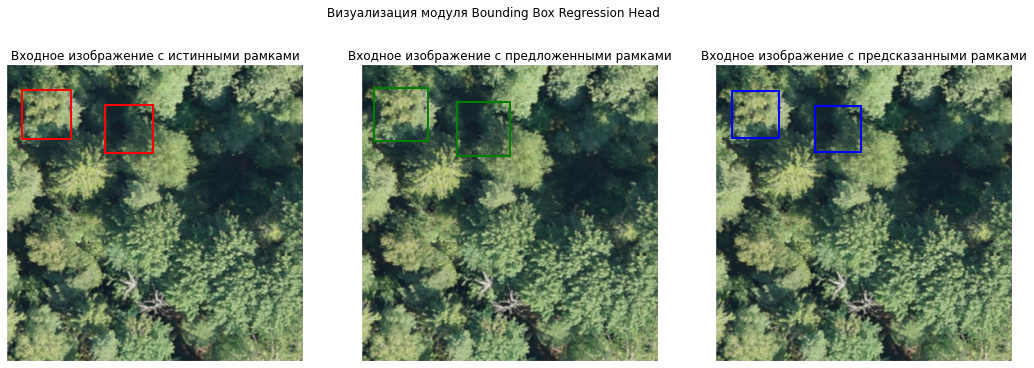

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from skimage import io

def plot_bbox_regression(image_path, true_boxes, proposed_boxes, predicted_boxes):
    # Загрузка изображения
    image = io.imread(image_path)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Входное изображение с истинными рамками
    ax[0].imshow(image)
    for box in true_boxes:
        y1, x1, y2, x2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)
    ax[0].set_title("Входное изображение с истинными рамками")
    ax[0].axis('off')

    # 2. Входное изображение с предложенными рамками (proposed boxes)
    ax[1].imshow(image)
    for box in proposed_boxes:
        y1, x1, y2, x2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')
        ax[1].add_patch(rect)
    ax[1].set_title("Входное изображение с предложенными рамками")
    ax[1].axis('off')

    # 3. Входное изображение с предсказанными рамками (predicted boxes)
    ax[2].imshow(image)
    for box in predicted_boxes:
        y1, x1, y2, x2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='b', facecolor='none')
        ax[2].add_patch(rect)
    ax[2].set_title("Входное изображение с предсказанными рамками")
    ax[2].axis('off')

    plt.suptitle("Визуализация модуля Bounding Box Regression Head")
    plt.show()

# Пример использования с пользовательским изображением и рамками
image_path = 'D:/codevkr/dataset/test/a12.jpg'  # Замените на путь к вашему изображению

# Истинные рамки (y1, x1, y2, x2)
true_boxes = [
    [50, 30, 150, 130],
    [80, 200, 180, 300]
]

# Предложенные рамки (до регрессии) (y1, x1, y2, x2)
proposed_boxes = [
    [45, 25, 155, 135],
    [75, 195, 185, 305]
]

# Предсказанные рамки (после регрессии) (y1, x1, y2, x2)
predicted_boxes = [
    [52, 32, 148, 128],
    [82, 202, 178, 298]
]

plot_bbox_regression(image_path, true_boxes, proposed_boxes, predicted_boxes)

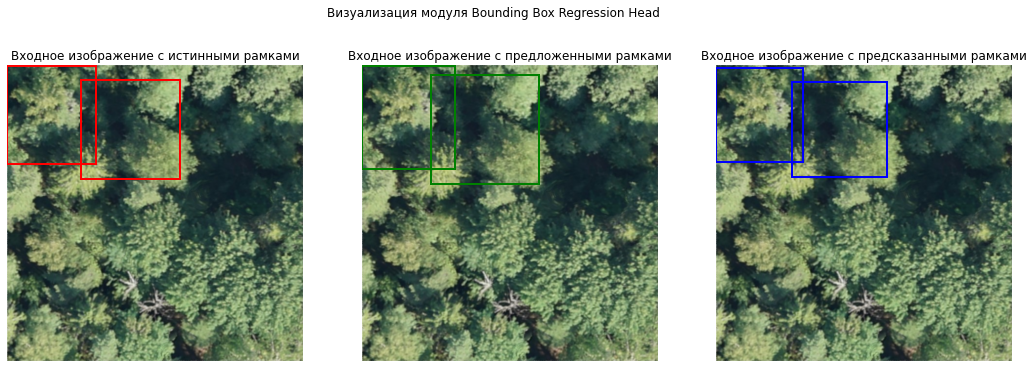

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from skimage import io

def plot_bbox_regression(image_path, true_boxes, proposed_boxes, predicted_boxes):
    # Загрузка изображения
    image = io.imread(image_path)
    # Проверка размера изображения и изменение размера до 600x600, если необходимо
    if image.shape[0] != 600 or image.shape[1] != 600:
        from skimage.transform import resize
        image = resize(image, (600, 600), preserve_range=True).astype(np.uint8)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Функция для увеличения рамок
    def enlarge_box(box, scale=2):
        y1, x1, y2, x2 = box
        h, w = (y2 - y1), (x2 - x1)
        center_y, center_x = y1 + h / 2, x1 + w / 2
        new_h, new_w = h * scale, w * scale
        new_y1, new_x1 = center_y - new_h / 2, center_x - new_w / 2
        new_y2, new_x2 = center_y + new_h / 2, center_x + new_w / 2
        return [max(0, int(new_y1)), max(0, int(new_x1)), min(600, int(new_y2)), min(600, int(new_x2))]

    # 1. Входное изображение с истинными рамками
    ax[0].imshow(image)
    for box in true_boxes:
        y1, x1, y2, x2 = enlarge_box(box)
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)
    ax[0].set_title("Входное изображение с истинными рамками")
    ax[0].axis('off')

    # 2. Входное изображение с предложенными рамками (proposed boxes)
    ax[1].imshow(image)
    for box in proposed_boxes:
        y1, x1, y2, x2 = enlarge_box(box)
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')
        ax[1].add_patch(rect)
    ax[1].set_title("Входное изображение с предложенными рамками")
    ax[1].axis('off')

    # 3. Входное изображение с предсказанными рамками (predicted boxes)
    ax[2].imshow(image)
    for box in predicted_boxes:
        y1, x1, y2, x2 = enlarge_box(box)
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='b', facecolor='none')
        ax[2].add_patch(rect)
    ax[2].set_title("Входное изображение с предсказанными рамками")
    ax[2].axis('off')

    plt.suptitle("Визуализация модуля Bounding Box Regression Head")
    plt.show()

# Пример использования с пользовательским изображением и рамками
image_path = 'D:/codevkr/dataset/test/a12.jpg'  # Замените на путь к вашему изображению

# Истинные рамки (y1, x1, y2, x2)
true_boxes = [
    [50, 30, 150, 130],
    [80, 200, 180, 300]
]

# Предложенные рамки (до регрессии) (y1, x1, y2, x2)
proposed_boxes = [
    [45, 25, 155, 135],
    [75, 195, 185, 305]
]

# Предсказанные рамки (после регрессии) (y1, x1, y2, x2)
predicted_boxes = [
    [52, 32, 148, 128],
    [82, 202, 178, 298]
]

plot_bbox_regression(image_path, true_boxes, proposed_boxes, predicted_boxes)

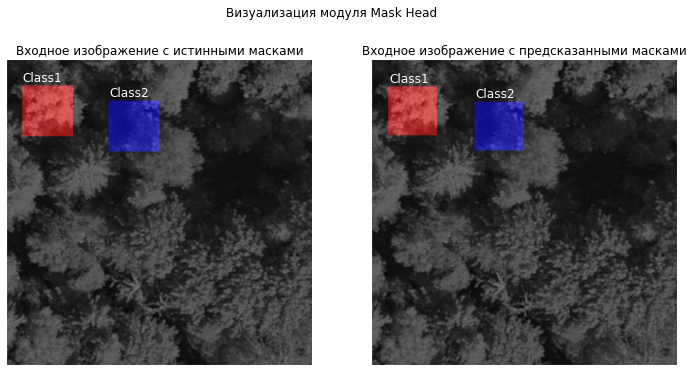

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from skimage import io
from skimage.color import label2rgb

def visualize_mask_head(image_path, true_masks, pred_masks, true_class_ids, pred_class_ids, class_names):
    # Загрузка изображения
    image = io.imread(image_path)
    # Проверка размера изображения и изменение размера до 600x600, если необходимо
    if image.shape[0] != 600 or image.shape[1] != 600:
        from skimage.transform import resize
        image = resize(image, (600, 600), preserve_range=True).astype(np.uint8)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # 1. Входное изображение с истинными масками
    true_mask_overlay = label2rgb(true_masks, image=image, bg_label=0, alpha=0.5)
    ax[0].imshow(true_mask_overlay)
    ax[0].set_title("Входное изображение с истинными масками")
    ax[0].axis('off')

    # Отображение истинных категорий
    for i in range(len(true_class_ids)):
        y1, x1, y2, x2 = true_class_ids[i]['bbox']
        ax[0].text(x1, y1 - 10, class_names[true_class_ids[i]['category_id']], color='w', fontsize=12, backgroundcolor="none")

    # 2. Входное изображение с предсказанными масками
    pred_mask_overlay = label2rgb(pred_masks, image=image, bg_label=0, alpha=0.5)
    ax[1].imshow(pred_mask_overlay)
    ax[1].set_title("Входное изображение с предсказанными масками")
    ax[1].axis('off')

    # Отображение предсказанных категорий
    for i in range(len(pred_class_ids)):
        y1, x1, y2, x2 = pred_class_ids[i]['bbox']
        ax[1].text(x1, y1 - 10, class_names[pred_class_ids[i]['category_id']], color='w', fontsize=12, backgroundcolor="none")

    plt.suptitle("Визуализация модуля Mask Head")
    plt.show()

# Пример использования с пользовательским изображением и масками
image_path = 'D:/codevkr/dataset/test/a12.jpg'  # Замените на путь к вашему изображению

# Истинные маски (в виде 2D numpy массивов, каждый элемент массива соответствует одному объекту)
true_masks = np.zeros((600, 600), dtype=np.uint8)
true_masks[50:150, 30:130] = 1  # Пример маски
true_masks[80:180, 200:300] = 2  # Пример маски

# Предсказанные маски (в виде 2D numpy массивов, каждый элемент массива соответствует одному объекту)
pred_masks = np.zeros((600, 600), dtype=np.uint8)
pred_masks[52:148, 32:128] = 1  # Пример маски
pred_masks[82:178, 202:298] = 2  # Пример маски

# Истинные классы и их рамки
true_class_ids = [
    {'bbox': [50, 30, 150, 130], 'category_id': 1},
    {'bbox': [80, 200, 180, 300], 'category_id': 2}
]

# Предсказанные классы и их рамки
pred_class_ids = [
    {'bbox': [52, 32, 148, 128], 'category_id': 1},
    {'bbox': [82, 202, 178, 298], 'category_id': 2}
]

# Имена категорий (замените на ваши реальные имена категорий)
class_names = {1: 'Class1', 2: 'Class2'}

visualize_mask_head(image_path, true_masks, pred_masks, true_class_ids, pred_class_ids, class_names)